<a href="https://colab.research.google.com/github/denihong/EscolaDNC_Desafio-6/blob/main/Desafio_6_Preveja_os_usu%C3%A1rios_com_alta_chance_de_deixar_seu_Streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/streaming_data.csv")

**1. Data Understanding**

In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
df.isnull().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

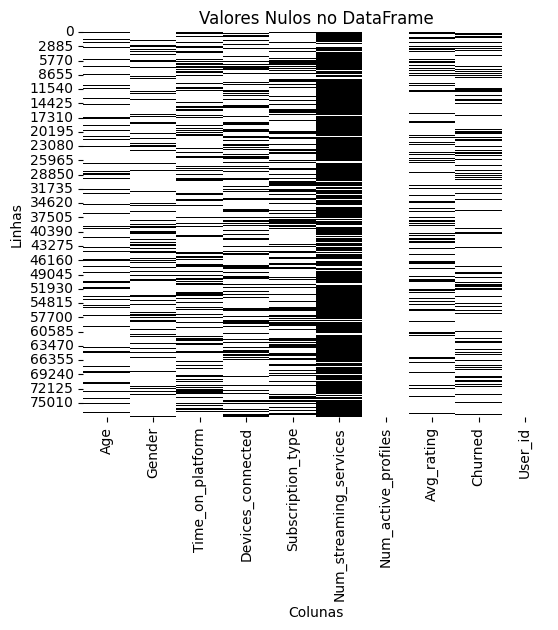

In [ ]:
mask = df.isnull()

# Plotando o mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(mask, cmap='binary', cbar=False)
plt.title('Valores Nulos no DataFrame')
plt.xlabel('Colunas')
plt.ylabel('Linhas')
plt.show()

**2. Data Preparation**

In [ ]:
valores_substituidos = {'Time_on_platform': 0 ,'Num_streaming_services': 0, 'Churned':0, 'Avg_rating':0, 'Devices_connected':0}

df.fillna(valores_substituidos, inplace=True)

In [ ]:
df.isnull().sum()

Age                       11277
Gender                    14516
Time_on_platform              0
Devices_connected             0
Subscription_type         25221
Num_streaming_services        0
Num_active_profiles           0
Avg_rating                    0
Churned                       0
User_id                       0
dtype: int64

In [ ]:
colunas_especificas = ['Gender', 'Subscription_type', 'Age']
df.dropna(subset=colunas_especificas, inplace=True)

In [ ]:
df.isnull().sum()

Age                       0
Gender                    0
Time_on_platform          0
Devices_connected         0
Subscription_type         0
Num_streaming_services    0
Num_active_profiles       0
Avg_rating                0
Churned                   0
User_id                   0
dtype: int64

In [ ]:
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024.0,2.0,Basic,0.0,1,0.00,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  object 
 9   User_id                 36515 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 3.1+ MB


In [ ]:
converter_float = ['Age', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services','Avg_rating']
df[converter_float]= df[converter_float].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     36515 non-null  int64 
 1   Gender                  36515 non-null  object
 2   Time_on_platform        36515 non-null  int64 
 3   Devices_connected       36515 non-null  int64 
 4   Subscription_type       36515 non-null  object
 5   Num_streaming_services  36515 non-null  int64 
 6   Num_active_profiles     36515 non-null  int64 
 7   Avg_rating              36515 non-null  int64 
 8   Churned                 36515 non-null  object
 9   User_id                 36515 non-null  object
dtypes: int64(6), object(4)
memory usage: 3.1+ MB


**3. Modelagem de Dados - Regressão Logística**

In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,Male,4700,3,Basic,0,3,0,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69,Female,6107,2,Standard,0,1,2,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44,Male,6374,3,Premium,1,1,1,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26,Male,0,5,Basic,0,2,0,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54,Male,3024,2,Basic,0,1,0,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df.Gender)
df.Gender = le.transform(df.Gender)

le.fit(df.Subscription_type)
df.Subscription_type = le.transform(df.Subscription_type)

le.fit(df.Churned)
df.Churned = le.transform(df.Churned)

le.fit(df.User_id)
df.User_id  = le.transform(df.User_id)


In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,1,4700,3,0,0,3,0,0,19499
1,69,0,6107,2,2,0,1,2,0,30498
2,44,1,6374,3,1,1,1,1,1,308
3,26,1,0,5,0,0,2,0,0,23377
5,54,1,3024,2,0,0,1,0,0,19436


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [ ]:
X = df.iloc[:, :-1]

y = df.iloc[:,-2]

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
predict = model.predict(X_test)

In [ ]:
X_test["prediction"] = predict

y_test = pd.DataFrame(y_test)

X_test["real"] = y_test["Churned"]
X_test.head(20)

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,prediction,real
4658,26,1,7384,3,0,0,4,3,0,0,0
54415,51,1,1793,5,1,0,4,4,0,0,0
62753,31,0,0,4,0,0,4,3,0,0,0
30426,38,0,1320,1,0,0,5,0,0,0,0
48441,23,1,0,3,2,0,5,3,0,0,0
11490,26,1,0,1,1,0,4,1,1,1,1
52422,32,0,6520,3,2,0,2,4,0,0,0
49765,45,1,1017,5,1,0,2,2,0,0,0
32055,48,0,3336,4,1,0,5,1,0,0,0
31637,65,1,6620,0,1,0,1,4,0,0,0


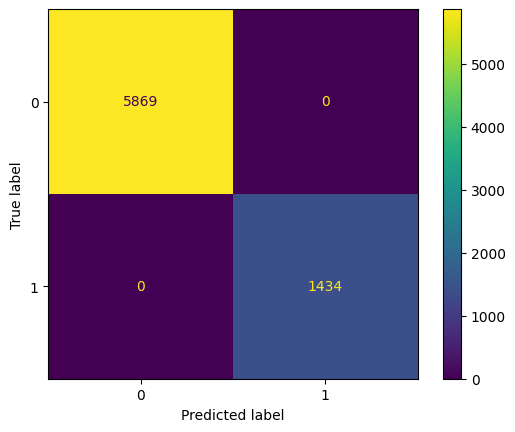

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score # Import necessary functions

In [ ]:
# Drop the added columns before prediction
X_test_for_prediction = X_test.drop(["prediction", "real"], axis=1)

# Now predict using the modified DataFrame
lr.predict(X_test_for_prediction)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Drop the added columns before prediction
X_test_for_prediction = X_test.drop(["prediction", "real"], axis=1)

metricas = {
    "model": ["Logistic Regression", "Logistic Regression"],
    "mode": ["treino", "teste"],
    "accuracy": [accuracy_score(y_train, lr.predict(X_train)), accuracy_score(y_test, lr.predict(X_test_for_prediction))],
    "balanced_accuracy":[balanced_accuracy_score(y_train, lr.predict(X_train)), balanced_accuracy_score(y_test, lr.predict(X_test_for_prediction))],
    "f1_score": [f1_score(y_train, lr.predict(X_train)), f1_score(y_test, lr.predict(X_test_for_prediction))]
}
pd.DataFrame(metricas)

,model,mode,accuracy,balanced_accuracy,f1_score
0,Logistic Regression,treino,1.0,1.0,1.0
1,Logistic Regression,teste,1.0,1.0,1.0


**04. Modelagem dos Dados - Tunning & Random Forest**





In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,1,4700,3,0,0,3,0,0,19499
1,69,0,6107,2,2,0,1,2,0,30498
2,44,1,6374,3,1,1,1,1,1,308
3,26,1,0,5,0,0,2,0,0,23377
5,54,1,3024,2,0,0,1,0,0,19436


In [ ]:
X = df[["Age", "Gender", "Time_on_platform", "Devices_connected", "Subscription_type", "Num_streaming_services", "Num_active_profiles", "Avg_rating", "User_id"]]

y = df[["Churned"]]
y = pd.DataFrame(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify = y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier()

arvore.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print(f"Accuracia Treino:{accuracy_score(y_train, arvore.predict(X_train))}")
print(f"Accuracia Teste:{accuracy_score(y_test, arvore.predict(X_test))}")

Accuracia Treino:1.0
Accuracia Teste:0.7517458578666302


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
"max_depth":[1,2,3,4,5,6,7,8,9,10]
}

grid_search = GridSearchCV(arvore, parameters, scoring="accuracy", cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)
grid_search = GridSearchCV(arvore, parameters, scoring="accuracy", cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

grid_search.best_estimator_.get_params()




{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
arvore_tunned = DecisionTreeClassifier(
ccp_alpha = 0.0,
class_weight = None,
criterion = 'gini',
max_depth = 1,
max_features = None,
max_leaf_nodes = None,
min_impurity_decrease = 0.0,
min_samples_leaf = 1,
min_samples_split = 2,
min_weight_fraction_leaf = 0.0,
random_state = None,
splitter = 'best'
)

In [ ]:
arvore_tunned.fit(X_train, y_train)

print(f"Accuracia Treino:{accuracy_score(y_train, arvore_tunned.predict(X_train))}")
print(f"Accuracia Teste:{accuracy_score(y_test, arvore_tunned.predict(X_test))}")

from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()

rf.fit(X_train, y_train)

print(f"Accuracia Treino:{accuracy_score(y_train, rf.predict(X_train))}")
print(f"Accuracia Teste:{accuracy_score(y_test, rf.predict(X_test))}")

Accuracia Treino:0.8067574969190744
Accuracia Teste:0.8067917294262632


<ipython-input-153-da1dc59f8c35>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Accuracia Treino:1.0
Accuracia Teste:0.851020128714227


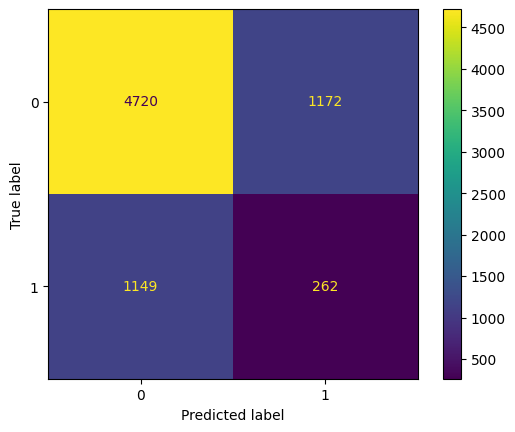

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()